In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
# Creiamo il layer di ingresso
inputs = keras.Input(shape=(784,))

# Primo layer denso con 64 unità
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

# secondo layer denso con 64 unità
x = layers.Dense(64, activation="relu")(x)

# Layer di output con attivazione lineare
outputs = layers.Dense(10)(x)

# Creiamo il modello
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

2023-06-01 11:26:11.281067: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22309 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:03:00.0, compute capability: 8.6


In [3]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


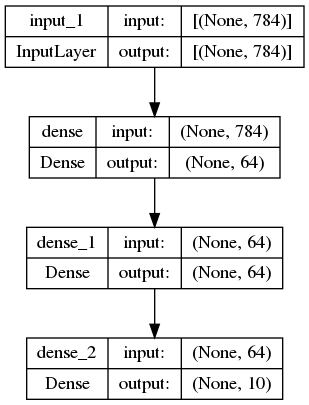

In [4]:
# Plot del grafo della rete
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


In [5]:
# creiamo il data set
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [6]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/20


2023-06-01 11:29:44.680314: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


750/750 [==============================] - 11s 9ms/step - loss: 0.3427 - accuracy: 0.9027 - val_loss: 0.1824 - val_accuracy: 0.9471
Epoch 2/20
750/750 [==============================] - 7s 9ms/step - loss: 0.1654 - accuracy: 0.9504 - val_loss: 0.1425 - val_accuracy: 0.9572
Epoch 3/20
750/750 [==============================] - 7s 9ms/step - loss: 0.1196 - accuracy: 0.9643 - val_loss: 0.1160 - val_accuracy: 0.9651
Epoch 4/20
750/750 [==============================] - 7s 9ms/step - loss: 0.0952 - accuracy: 0.9695 - val_loss: 0.1172 - val_accuracy: 0.9663
Epoch 5/20
750/750 [==============================] - 7s 9ms/step - loss: 0.0796 - accuracy: 0.9753 - val_loss: 0.0998 - val_accuracy: 0.9711
Epoch 6/20
750/750 [==============================] - 7s 9ms/step - loss: 0.0686 - accuracy: 0.9783 - val_loss: 0.1067 - val_accuracy: 0.9688
Epoch 7/20
750/750 [==============================] - 6s 9ms/step - loss: 0.0589 - accuracy: 0.9828 - val_loss: 0.1061 - val_accuracy: 0.9712
Epoch 8/20
750/7

In [7]:
history.history

{'loss': [0.3427092730998993,
  0.16538985073566437,
  0.1196301132440567,
  0.09520969539880753,
  0.07959116995334625,
  0.06856627762317657,
  0.05885302647948265,
  0.05151723325252533,
  0.04631785675883293,
  0.04033537581562996,
  0.03519684076309204,
  0.032284077256917953,
  0.028496017679572105,
  0.025342188775539398,
  0.023424427956342697,
  0.019787481054663658,
  0.017641007900238037,
  0.016331778839230537,
  0.01386545691639185,
  0.01271715760231018],
 'accuracy': [0.9026666879653931,
  0.9503541588783264,
  0.9642500281333923,
  0.9695208072662354,
  0.9752916693687439,
  0.9783124923706055,
  0.9827708601951599,
  0.9842291474342346,
  0.9857083559036255,
  0.9877916574478149,
  0.9893749952316284,
  0.9904166460037231,
  0.9913125038146973,
  0.9918333292007446,
  0.9928333163261414,
  0.9937291741371155,
  0.9947708249092102,
  0.9949583411216736,
  0.9954583048820496,
  0.9959999918937683],
 'val_loss': [0.18236607313156128,
  0.1425340324640274,
  0.116028882563

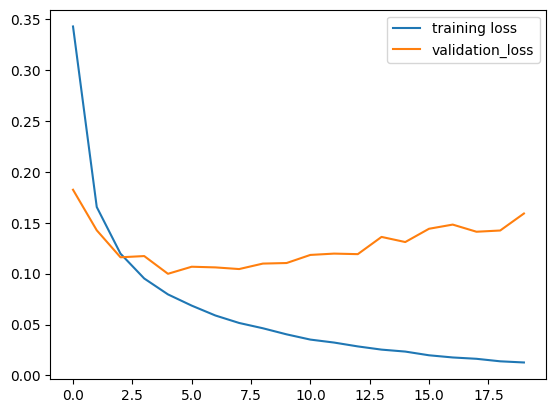

In [11]:
epochs = np.arange(21)

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend(loc='upper right')
plt.show()

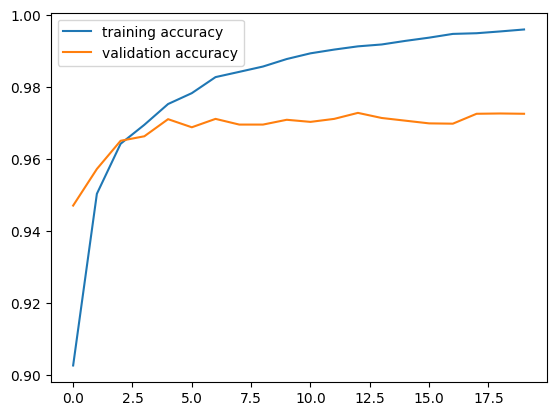

In [12]:

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='upper left')
plt.show()